In [1]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('./bbc-news-data.csv', sep='\t')
df.head()

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [6]:
df['content'][0]

' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL\'s existing customers for high-

In [7]:
df.shape

(2225, 4)

In [8]:
data = df.dropna().reset_index(drop=True)
data.shape

(2225, 4)

# Tokenization

In [10]:
# sent_tokenize - Tokenizes Sentences
import nltk
from nltk.tokenize import sent_tokenize
tqdm.pandas()

In [14]:
from tqdm import tqdm
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/kayd/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:

data['sentences'] = data.content.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 2225/2225 [00:00<00:00, 3389.34it/s]


[' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.',
 'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.']

In [19]:
data.sentences.head()[0]

[' Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.',
 'The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales.',
 'TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.',
 'Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.',
 'Time Warner said on Friday that it now owns 8% of search-engine Google.',
 'But its own internet business, AOL, had has mixed fortunes.',
 'It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.',
 "However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues.",
 "It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sign up AOL's

In [20]:
from nltk.tokenize import word_tokenize
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2225/2225 [00:04<00:00, 522.17it/s]

[['Quarterly', 'profits', 'at', 'US', 'media', 'giant', 'TimeWarner', 'jumped', '76', '%', 'to', '$', '1.13bn', '(', '£600m', ')', 'for', 'the', 'three', 'months', 'to', 'December', ',', 'from', '$', '639m', 'year-earlier', '.'], ['The', 'firm', ',', 'which', 'is', 'now', 'one', 'of', 'the', 'biggest', 'investors', 'in', 'Google', ',', 'benefited', 'from', 'sales', 'of', 'high-speed', 'internet', 'connections', 'and', 'higher', 'advert', 'sales', '.'], ['TimeWarner', 'said', 'fourth', 'quarter', 'sales', 'rose', '2', '%', 'to', '$', '11.1bn', 'from', '$', '10.9bn', '.']]


In [21]:
data.tokens_sentences.head()[0]

[['Quarterly',
  'profits',
  'at',
  'US',
  'media',
  'giant',
  'TimeWarner',
  'jumped',
  '76',
  '%',
  'to',
  '$',
  '1.13bn',
  '(',
  '£600m',
  ')',
  'for',
  'the',
  'three',
  'months',
  'to',
  'December',
  ',',
  'from',
  '$',
  '639m',
  'year-earlier',
  '.'],
 ['The',
  'firm',
  ',',
  'which',
  'is',
  'now',
  'one',
  'of',
  'the',
  'biggest',
  'investors',
  'in',
  'Google',
  ',',
  'benefited',
  'from',
  'sales',
  'of',
  'high-speed',
  'internet',
  'connections',
  'and',
  'higher',
  'advert',
  'sales',
  '.'],
 ['TimeWarner',
  'said',
  'fourth',
  'quarter',
  'sales',
  'rose',
  '2',
  '%',
  'to',
  '$',
  '11.1bn',
  'from',
  '$',
  '10.9bn',
  '.'],
 ['Its',
  'profits',
  'were',
  'buoyed',
  'by',
  'one-off',
  'gains',
  'which',
  'offset',
  'a',
  'profit',
  'dip',
  'at',
  'Warner',
  'Bros',
  ',',
  'and',
  'less',
  'users',
  'for',
  'AOL',
  '.'],
 ['Time',
  'Warner',
  'said',
  'on',
  'Friday',
  'that',
  'it'

# Lemmentization with POS Tagging

In [22]:
from nltk import pos_tag

In [26]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/kayd/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [27]:
data['POS_tokens'] = data['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head()[0][:3])

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2225/2225 [00:23<00:00, 93.26it/s]

[[('Quarterly', 'JJ'), ('profits', 'NNS'), ('at', 'IN'), ('US', 'NNP'), ('media', 'NNS'), ('giant', 'JJ'), ('TimeWarner', 'NNP'), ('jumped', 'VBD'), ('76', 'CD'), ('%', 'NN'), ('to', 'TO'), ('$', '$'), ('1.13bn', 'CD'), ('(', '('), ('£600m', 'NN'), (')', ')'), ('for', 'IN'), ('the', 'DT'), ('three', 'CD'), ('months', 'NNS'), ('to', 'TO'), ('December', 'NNP'), (',', ','), ('from', 'IN'), ('$', '$'), ('639m', 'CD'), ('year-earlier', 'JJ'), ('.', '.')], [('The', 'DT'), ('firm', 'NN'), (',', ','), ('which', 'WDT'), ('is', 'VBZ'), ('now', 'RB'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('biggest', 'JJS'), ('investors', 'NNS'), ('in', 'IN'), ('Google', 'NNP'), (',', ','), ('benefited', 'VBD'), ('from', 'IN'), ('sales', 'NNS'), ('of', 'IN'), ('high-speed', 'JJ'), ('internet', 'NN'), ('connections', 'NNS'), ('and', 'CC'), ('higher', 'JJR'), ('advert', 'NN'), ('sales', 'NNS'), ('.', '.')], [('TimeWarner', 'NNP'), ('said', 'VBD'), ('fourth', 'JJ'), ('quarter', 'NN'), ('sales', 'NNS'), ('rose'

In [28]:
# Inspired from https://stackoverflow.com/a/15590384

    # default pos tag is NOUN and that it does not output the correct 
    # lemma for a verb, unless the pos tag is explicitly specified as VERB.
    #  output tags in NN,JJ,VB,RB. and these are not Wordnet compatible POS tags

#  following function would map the treebank tags to WordNet part of speech names

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [34]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/kayd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/kayd/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [35]:
# Lemmatizing each word with its POS tag, in each sentence
data['tokens_sentences_lemmatized'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos(el[1]) != '' else el[0] for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2225/2225 [00:02<00:00, 863.68it/s]


In [36]:
data['tokens_sentences_lemmatized'].head().tolist()[0][:3]

[['Quarterly',
  'profit',
  'at',
  'US',
  'medium',
  'giant',
  'TimeWarner',
  'jump',
  '76',
  '%',
  'to',
  '$',
  '1.13bn',
  '(',
  '£600m',
  ')',
  'for',
  'the',
  'three',
  'month',
  'to',
  'December',
  ',',
  'from',
  '$',
  '639m',
  'year-earlier',
  '.'],
 ['The',
  'firm',
  ',',
  'which',
  'be',
  'now',
  'one',
  'of',
  'the',
  'big',
  'investor',
  'in',
  'Google',
  ',',
  'benefit',
  'from',
  'sale',
  'of',
  'high-speed',
  'internet',
  'connection',
  'and',
  'high',
  'advert',
  'sale',
  '.'],
 ['TimeWarner',
  'say',
  'fourth',
  'quarter',
  'sale',
  'rise',
  '2',
  '%',
  'to',
  '$',
  '11.1bn',
  'from',
  '$',
  '10.9bn',
  '.']]

# Regrouping tokens and Removing Stop Words

In [38]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/kayd/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'would', 'can']
stopwords_other = ['one', 'mr', 'bbc', 'image', 'getty', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('english') + stopwords_verbs + stopwords_other

In [41]:
# to flatten list of sentences of tokens into list of tokens
from itertools import chain 

In [43]:
data['tokens'] = data['tokens_sentences_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens'].head()

0    [Quarterly, profit, at, US, medium, giant, Tim...
1    [The, dollar, have, hit, its, high, level, aga...
2    [The, owner, of, embattled, Russian, oil, gian...
3    [British, Airways, have, blame, high, fuel, pr...
4    [Shares, in, UK, drink, and, food, firm, Allie...
Name: tokens, dtype: object

In [46]:
data['tokens'] = data['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])
data['tokens'].head()

0    [quarterly, profit, us, medium, giant, timewar...
1    [dollar, hit, high, level, euro, almost, three...
2    [owner, embattled, russian, oil, giant, yukos,...
3    [british, airways, blame, high, fuel, price, d...
4    [shares, uk, drink, food, firm, allied, domecq...
Name: tokens, dtype: object

In [49]:
data.head()

,category,filename,title,content,sentences,tokens_sentences,POS_tokens,tokens_sentences_lemmatized,tokens
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,[ Quarterly profits at US media giant TimeWarn...,"[[Quarterly, profits, at, US, media, giant, Ti...","[[(Quarterly, JJ), (profits, NNS), (at, IN), (...","[[Quarterly, profit, at, US, medium, giant, Ti...","[quarterly, profit, us, medium, giant, timewar..."
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,[ The dollar has hit its highest level against...,"[[The, dollar, has, hit, its, highest, level, ...","[[(The, DT), (dollar, NN), (has, VBZ), (hit, V...","[[The, dollar, have, hit, its, high, level, ag...","[dollar, hit, high, level, euro, almost, three..."
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,[ The owners of embattled Russian oil giant Yu...,"[[The, owners, of, embattled, Russian, oil, gi...","[[(The, DT), (owners, NNS), (of, IN), (embattl...","[[The, owner, of, embattled, Russian, oil, gia...","[owner, embattled, russian, oil, giant, yukos,..."
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,[ British Airways has blamed high fuel prices ...,"[[British, Airways, has, blamed, high, fuel, p...","[[(British, JJ), (Airways, NNP), (has, VBZ), (...","[[British, Airways, have, blame, high, fuel, p...","[british, airways, blame, high, fuel, price, d..."
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,[ Shares in UK drinks and food firm Allied Dom...,"[[Shares, in, UK, drinks, and, food, firm, All...","[[(Shares, NNS), (in, IN), (UK, NNP), (drinks,...","[[Shares, in, UK, drink, and, food, firm, Alli...","[shares, uk, drink, food, firm, allied, domecq..."


# LDA

## Data Preparation

### Prepare bi-grams and tri-grams

In [48]:
# About gensim.models.Phrases:
# Automatically detect common phrases – aka multi-word expressions, 
    # word n-gram collocations – from a stream of sentences.
from gensim.models import Phrases

In [50]:
tokens = data['tokens'].tolist()
bigram_model = Phrases(tokens)
trigram_model = Phrases(bigram_model[tokens], min_count=1)

tokens = list(trigram_model[bigram_model[tokens]])


In [53]:
tokens[0]

['quarterly_profit',
 'us',
 'medium_giant',
 'timewarner',
 'jump',
 'three_month_december',
 'firm',
 'big',
 'investor',
 'google',
 'benefit',
 'sale',
 'internet_connection',
 'high',
 'advert',
 'sale',
 'timewarner',
 'fourth_quarter',
 'sale_rise',
 'profit',
 'buoy',
 'gain',
 'offset',
 'profit',
 'dip',
 'warner_bros',
 'less',
 'user',
 'aol',
 'time_warner',
 'friday',
 'google',
 'internet_business',
 'aol',
 'mix',
 'fortune',
 'lose',
 'subscriber',
 'fourth_quarter_profit',
 'low',
 'preceding',
 'three_quarter',
 'however',
 'company',
 'aol',
 'underlying_profit',
 'exceptional',
 'item',
 'rise',
 'back',
 'strong',
 'internet',
 'advertising_revenue',
 'hop_increase',
 'subscriber',
 'offer',
 'online',
 'service',
 'free',
 'timewarner',
 'internet',
 'customer',
 'try',
 'sign',
 'aol',
 'exist',
 'customer',
 'broadband',
 'timewarner_restate',
 'result',
 'follow',
 'probe_us',
 'securities_exchange_commission_sec',
 'close_conclude',
 'time_warner',
 'fourth_q

### Prepare Objects for LDA gensim implementation

In [54]:
from gensim import corpora

In [55]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

# Running LDA

In [56]:
from gensim import models
import numpy as np

In [58]:
np.random.seed(123456)
num_topics = 20

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=[0.01]*num_topics, eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 13.4 s, sys: 8.25 s, total: 21.7 s
Wall time: 6.92 s


# Exploration of LDA results

## Looking at Topics

In [59]:
for i, topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20):
    print(str(i) + ': '+ topic)
    print()

0: 0.015*"us" + 0.009*"company" + 0.008*"player" + 0.008*"motorola" + 0.007*"people" + 0.007*"user" + 0.007*"system" + 0.007*"time" + 0.006*"file" + 0.006*"data" + 0.005*"technology" + 0.005*"even" + 0.004*"service" + 0.004*"offer" + 0.004*"evidence" + 0.004*"play" + 0.004*"around" + 0.004*"another" + 0.004*"four" + 0.004*"provide"

1: 0.029*"people" + 0.021*"phone" + 0.017*"map" + 0.015*"find" + 0.014*"handset" + 0.012*"respond" + 0.012*"number" + 0.011*"lose" + 0.010*"life" + 0.009*"help" + 0.008*"technology" + 0.008*"try" + 0.008*"start" + 0.007*"new" + 0.007*"data" + 0.007*"mobile" + 0.007*"change" + 0.007*"hand" + 0.006*"grow" + 0.006*"network"

2: 0.012*"party" + 0.008*"play" + 0.008*"poster" + 0.007*"game" + 0.007*"labour" + 0.006*"campaign" + 0.005*"well" + 0.005*"number" + 0.005*"club" + 0.004*"parent" + 0.004*"part" + 0.004*"uk" + 0.004*"gig" + 0.004*"child" + 0.004*"vote" + 0.004*"industry" + 0.004*"run" + 0.004*"add" + 0.004*"election" + 0.004*"win"

3: 0.010*"robot" + 0.01

## Allocating Topics to Documents

In [60]:
print(data.content.loc[0][:500])

 Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now o


In [64]:
lda_model[corpus[5]]

[(1, 0.028407112),
 (3, 0.26602045),
 (6, 0.3791756),
 (10, 0.17612286),
 (19, 0.1478105)]

# Predicting topics on Unseen Documents

In [65]:
document = """
The speaker of Arizona's statehouse, Rusty Bowers, told the committee probing last year's Capitol riot that the harassment continues to this day.

A Georgia voter counter said she was afraid to leave home after ex-President Donald Trump specifically targeted her.

The House of Representatives panel accuses Mr Trump of an attempted coup.

The select committee has conducted a nearly yearlong investigation into how Trump supporters invaded Congress on 6 January 2021 to disrupt lawmakers as they certified Democrat Joe Biden's election victory.

On Tuesday, in the fourth public hearing so far, the panel heard from election workers in the states of Arizona and Georgia. Mr Biden defeated Mr Trump in both states, which had previously backed Republicans for the White House.

"We received... in excess of 20,000 emails and tens of thousands of voice mails and texts, which saturated our offices and we were unable to work, at least communicate," Mr Bowers, speaker of the Arizona House of Representatives, told the select committee.

The witness - who campaigned for Mr Trump in 2020 - said the threats and insults have continued with protesters outside his house attempting to smear him as a paedophile.

"It was disturbing, it was disturbing," Mr Bowers said.

He recalled Trump lawyer Rudy Giuliani at one point telling him: "We've got lots of theories, we just don't have the evidence."

The panel also heard testimony from Shaye Moss and her mother, Ruby Freeman, who became the targets of conspiracy theories in their jobs as election workers in Fulton County, Georgia.
Lawmakers also heard from Republican poll organisers in Georgia about their difficulty in stamping out conspiracies fanned by Mr Trump.

Gabriel Sterling, a top election official in Georgia, told the committee that fighting the election scam claims "was like a shovel trying to empty the ocean".

His boss - Georgia Secretary of State Brad Raffensperger, whom Mr Trump repeatedly pressed to "find" the votes he needed to win the state - ticked through a laundry list of allegations made by the Trump team in legal action against the state.

"In their lawsuits, they alleged 10,315 dead people [voted]," Mr Raffensperger said, but a thorough review found a total of only four.

The secretary said further investigation had debunked other claims about illegal votes by underage and non-registered voters, as well as convicts.

"We had many allegations and we investigated every single one of them."

The hearings have attempted to tie the former president directly to the efforts to overturn the election.

At Tuesday's hearing, the committee chairman Bennie Thompson, a Democrat, said: "A handful of election officials in several key states stood between Donald Trump and the upending of American democracy."

His deputy on the committee, Liz Cheney, a Republican, said: "We cannot let America become a nation of conspiracy theories and thug violence."
"""

In [66]:
tokens = word_tokenize(document)
topics = lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=20)
pd.DataFrame([(el[0], round(el[1],2), topics[el[0]][1]) for el in lda_model[dictionary_LDA.doc2bow(tokens)]], columns=['topic #', 'weight', 'words in topic'])

,topic #,weight,words in topic
0,0,0.05,"0.015*""us"" + 0.009*""company"" + 0.008*""player"" ..."
1,2,0.17,"0.012*""party"" + 0.008*""play"" + 0.008*""poster"" ..."
2,3,0.02,"0.010*""robot"" + 0.010*""first"" + 0.009*""picture..."
3,4,0.11,"0.014*""service"" + 0.009*""people"" + 0.008*""uk"" ..."
4,6,0.37,"0.013*""government"" + 0.013*""new"" + 0.006*""plan..."
5,8,0.07,"0.010*""people"" + 0.009*""work"" + 0.009*""music"" ..."
6,9,0.03,"0.030*""technology"" + 0.026*""firm"" + 0.014*""app..."
7,10,0.03,"0.019*""china"" + 0.012*""company"" + 0.010*""econo..."
8,11,0.01,"0.016*""people"" + 0.013*""show"" + 0.012*""compute..."
9,13,0.07,"0.009*""could"" + 0.009*""game"" + 0.008*""time"" + ..."


# Advanced Exploration of LDA results

## Allocation topics for all documents

In [67]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [68]:
def topic_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topic_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038537,NaN,NaN,NaN,NaN,NaN,0.091301,NaN,NaN,0.869287,NaN


In [72]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = pd.concat([topic_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [73]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.026721,0.0,0.000000,0.0,0.145939,0.0,0.361266,0.0000,0.064567,0.00000,0.100016,0.010002,0.000000,0.00000,0.000000,0.031028,0.000000,0.000000,0.000000,0.259582
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.398482,0.2768,0.000000,0.00000,0.323504,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.159011,0.0000,0.000000,0.00000,0.316176,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.522539,0.000000,0.000000
3,0.000000,0.0,0.079076,0.0,0.042543,0.0,0.384688,0.0000,0.000000,0.00000,0.109965,0.033341,0.055757,0.07293,0.023593,0.030604,0.144334,0.000000,0.022448,0.000000
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.364715,0.0000,0.000000,0.31354,0.167025,0.000000,0.000000,0.00000,0.000000,0.152764,0.000000,0.000000,0.000000,0.000000


In [74]:
# Which document are about topic 14
document_topic.sort_values(14, ascending=False)[14].head(20)

2134    0.998541
1918    0.998419
1898    0.993014
2126    0.993014
2013    0.878999
1841    0.826665
2019    0.718169
2058    0.598836
1983    0.596599
2026    0.580480
2143    0.568091
2186    0.525404
2171    0.518293
1961    0.489870
1875    0.465939
2061    0.464071
807     0.449647
1182    0.448970
1012    0.448926
2008    0.441067
Name: 14, dtype: float64

In [76]:
print(data.content.loc[1918])

 The BBC News website takes a look at how games on mobile phones are maturing. A brief round-up follows but you can skip straight to the reviews by clicking on the links below.  If you think of Snake when some mentions "mobile games" then you could be in for a bit of a surprise. This is because mobile games have come a long way in a very short time. Even before Nokia's N-Gage game phone launched in late 2003, many mobile operators were realising that there was an audience looking for something to play on their handset.  And given that many more people own handsets than own portable game playing gadgets such as the GameBoy it could be a very lucrative market. That audience includes commuters wanting something to fill their time on the way home, game fans looking for a bit of variety and hard core gamers who like to play every moment they can. Life for all these types of player has got immeasurably better in the last year as the numbers of titles you can download to your phone has snowba

## Looking at the distribution of topics in all documents

<AxesSubplot:>

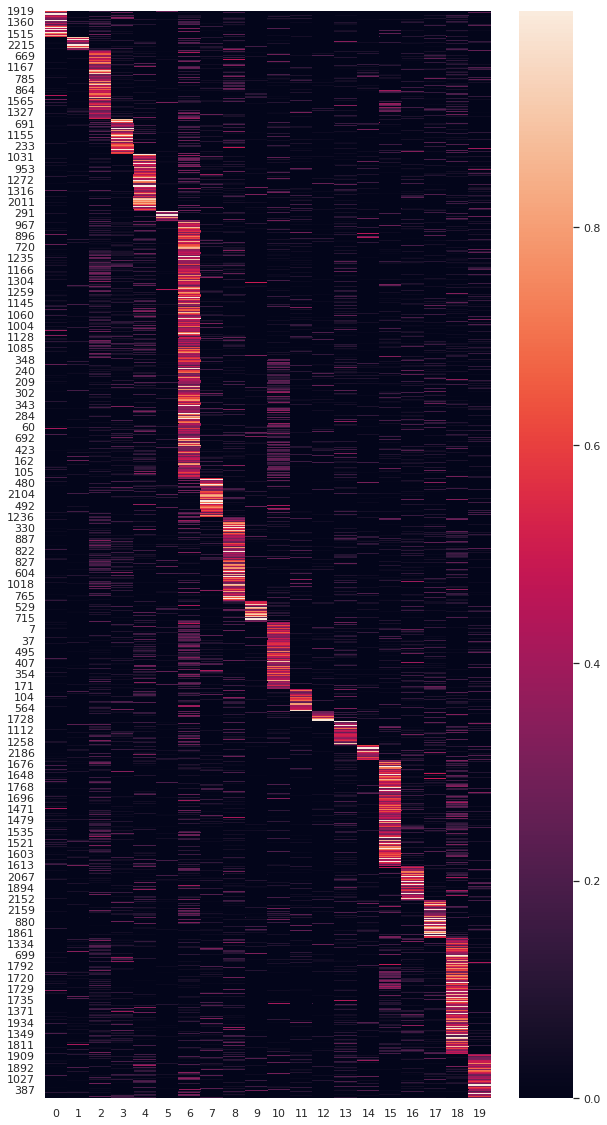

In [78]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

<AxesSubplot:>

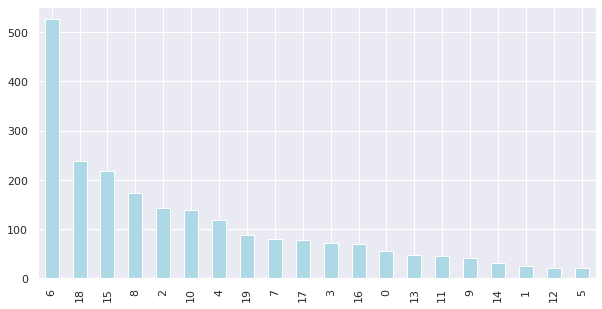

In [79]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

# Visualize Topics

In [82]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models as gensimvis
vis = gensimvis.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/home/kayd/.local/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/usr/lib/python3/dist-packages/past/types/oldstr.py:23: DeprecationWarning: invalid escape sequence \d
  """
/usr/lib/python3/dist-packages/past/types/oldstr.py:23: DeprecationWarning: invalid escape sequence \d
  """
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/usr/lib/python3/dist-packages/past/types/oldstr.py:23: DeprecationWarning: invalid escape sequence \d
  """
/u